In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from math import sqrt

In [2]:
X = pd.read_csv('Iris.csv')
X

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


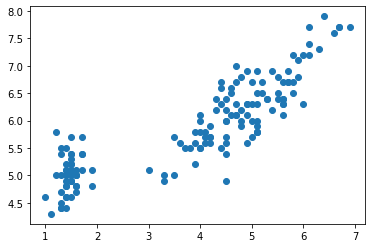

In [7]:
plt.scatter(X['PetalLengthCm'], X['SepalLengthCm'])

In [14]:
K = 3
Centroids = (X.sample(n=K))
Centroids

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,1,2,3
149,150,5.9,3.0,5.1,1.8,Iris-virginica,3.676955,0.565685,0.282843
67,68,5.8,2.7,4.1,1.0,Iris-versicolor,3.535534,0.707107,0.141421
22,23,4.6,3.6,1.0,0.2,Iris-setosa,1.838478,2.404163,1.555635


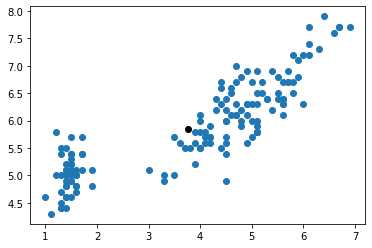

In [23]:
plt.scatter(X['PetalLengthCm'], X['SepalLengthCm'])
plt.scatter(Centroids['PetalLengthCm'], Centroids['SepalLengthCm'], c = 'k')

In [26]:
diff = 1
j = 0
while(diff == 0):
    XD = X
    i = 1
    for index1,row_c in Centroids.iterrows():
        ED = []
        for index2,row_d in XD.iterrows():
            d1 = (row_c["PetalLengthCm"] - row_d["SepalLengthCm"])**2
            d2 = (row_c["PetalLengthCm"] - row_d["SepalLengthCm"])**2
            d = sqrt(d1+d2)
            ED.append(d)
        X[i] = ED
        i = i+1
    C = []
    for index,row in X.iterrows():
        min_dist = row[1]
        pos = 1
        for i in range(K):
            if row[i+1]<min_dist:
                min_dist = row[i+1]
                pos = i+1
        C.append(pos)
    X["Clust"] = C
    Centroids_new = X.groupby(["Clust"]).mean()[["SepalLengthCm", "PetalLengthCm"]]
    if j == 0:
        diff = 1
        j = j+1
    else:
        diff = (Centroids_new['SepalLengthCm'] - Centroids['SepalLengthCm']).sum()+(Centroids_new['PetalLengthCm'] - Centroids['PetalLengthCm'])
        
    Centroids = X.groupby(["Clust"]).mean()[["SepalLengthCm", "PetalLengthCm"]]

In [28]:
Centroids

,SepalLengthCm,PetalLengthCm
Clust,,
1,5.843333,3.758667


Text(0, 0.5, 'SepalLengthCm')

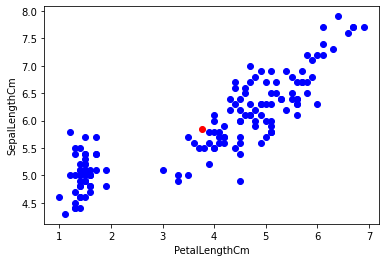

In [29]:
color = ['b', 'g', 'k']
for k in range(K):
    data = X[X["Clust"] == k + 1]
    plt.scatter(data['PetalLengthCm'], data['SepalLengthCm'], c = color[k])
plt.scatter(Centroids['PetalLengthCm'], Centroids['SepalLengthCm'], c = 'r')
plt.xlabel('PetalLengthCm')
plt.ylabel('SepalLengthCm')
